In [1]:
import os
import glob

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from bioinfokit.analys import stat

In [2]:
import matplotlib
matplotlib.rcParams['figure.dpi'] = 300

import scienceplots
plt.style.use(['science', 'no-latex'])

## Remake Confusion Matrix

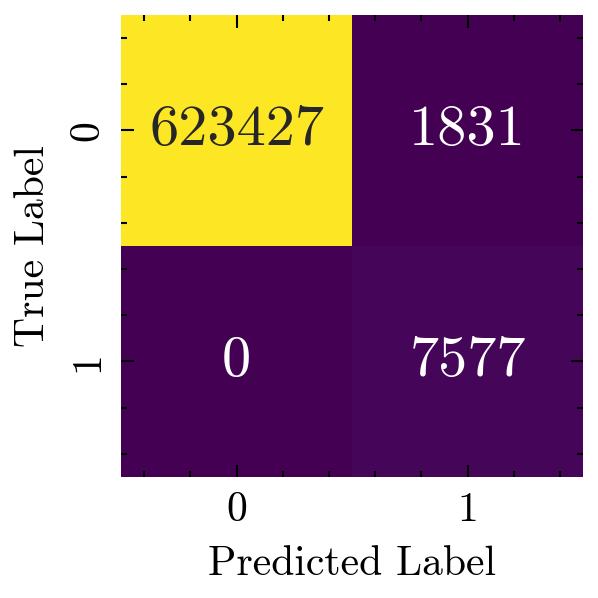

In [33]:
fig, ax = plt.subplots(figsize=(2, 2))

cm = np.array([[623427, 1831], [0, 7577]])
sns.heatmap(cm, annot=True, fmt=".0f", annot_kws={"fontsize": 14}, cbar=False, cmap="viridis", square=True, ax=ax)
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")

fig.savefig("FIG-7d.jpg")
fig.savefig("FIG-7d.pdf")
plt.show()

## SHAP Values

In [13]:
df = pd.concat([pd.read_csv(path, names=["variable_name", "shap_value"], skiprows=1).assign(filename=os.path.basename(path)) for path in glob.glob("../dataset/shap-*.csv")], ignore_index=True)
df.head()

,variable_name,shap_value,filename
0,distance,0.102974,shap-undersampling-decision-tree.csv
1,pbo,0.101845,shap-undersampling-decision-tree.csv
2,aspect,0.046050,shap-undersampling-decision-tree.csv
3,depth,0.044245,shap-undersampling-decision-tree.csv
4,slope,0.043561,shap-undersampling-decision-tree.csv


In [14]:
df["model"] = df["filename"].str.replace("shap-", "").str.replace("undersampling-", "").replace({"xgboost.csv": "XGBoost", "catboost.csv": "CatBoost", "decision-tree.csv": "Decision Tree", "random-forest.csv": "Random Forest"})
df["undersampling"] = df["filename"].str.contains("undersampling")

In [15]:
df.pivot_table(index=["variable_name"], columns=["undersampling", "model"], values=["shap_value"])

shap_value                                                  \
undersampling      False                                           True    
model           CatBoost Decision Tree Random Forest   XGBoost  CatBoost   
variable_name                                                              
aspect          2.914638      0.004754      0.032398  1.750558  0.990027   
chl             0.281314      0.000285      0.006848  0.064693  0.076236   
depth           4.977032      0.003939      0.053743  2.165440  1.237007   
dissic          0.509632      0.000824      0.012399  0.237825  0.543152   
distance        5.805533      0.007624      0.097930  5.650849  4.979395   
fe              0.116532      0.000916      0.027133  0.354946  0.239309   
no3             0.301818      0.000516      0.008960  0.121744  0.096571   
nppv            0.025344      0.001260      0.007863  0.110625  0.204576   
o2              0.367180      0.000335      0.009188  0.087312  0.103548   
pbo             2.124341      0.005587      0.057836  3.215046  0.946723   
ph              0.110700      0.000392      0.005875  0.041530  0.063772   
phyc            0.235649      0.000504      0.007615  0.090796  0.112973   
po4             0.550443      0.001541      0.018921  0.629262  0.309839   
si              0.425552      0.000828      0.011005  0.287038  0.375074   
slope           1.739041      0.004508      0.042989  2.037494  1.351783   
so              0.162410      0.000268      0.008618  0.096433  0.049398   
sob             0.126639      0.000474      0.013447  0.096906  0.140068   
spco2           0.100389      0.000200      0.003935  0.155980  0.203205   
talk            0.413755      0.000985      0.010299  0.185391  0.157018   
thetao          0.036619      0.000354      0.008732  0.125362  0.135714   
tob             0.557865      0.000720      0.043459  0.145172  1.160515   
uo              0.034262      0.000422      0.006097  0.082847  0.096527   
vo              0.025236      0.000224      0.003662  0.046196  0.077869   
wo              0.000000      0.000214      0.000335  0.004626  0.036938   
zos             0.256487      0.000633      0.012102  0.224010  0.222345   

                                                     
undersampling                                        
model         Decision Tree Random Forest   XGBoost  
variable_name                                        
aspect             0.046050      0.024394  0.950194  
chl                0.002438      0.004091  0.087039  
depth              0.044245      0.057334  2.038274  
dissic             0.011055      0.011870  0.254729  
distance           0.102974      0.146108  4.713457  
fe                 0.003451      0.027231  0.078057  
no3                0.004505      0.005121  0.121930  
nppv               0.017675      0.007526  0.161654  
o2                 0.004254      0.004355  0.079796  
pbo                0.101845      0.062919  2.242000  
ph                 0.002041      0.002947  0.057742  
phyc               0.006019      0.006539  0.104068  
po4                0.019688      0.013759  0.507363  
si                 0.006132      0.008192  0.180503  
slope              0.043561      0.034465  1.152693  
so                 0.011299      0.005588  0.105321  
sob                0.013786      0.012098  0.097860  
spco2              0.002400      0.002388  0.048885  
talk               0.014708      0.005329  0.130284  
thetao             0.010069      0.004757  0.068599  
tob                0.015985      0.065059  0.074562  
uo                 0.002814      0.002739  0.082639  
vo                 0.003014      0.001651  0.056713  
wo                 0.001835      0.000175  0.022533  
zos                0.010023      0.006754  0.149615

/tmp/ipykernel_10585/3389463270.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=40, ha="right")
/tmp/ipykernel_10585/3389463270.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=40, ha="right")
/tmp/ipykernel_10585/3389463270.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=40, ha="right")
/tmp/ipykernel_10585/3389463270.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=40, ha="right")


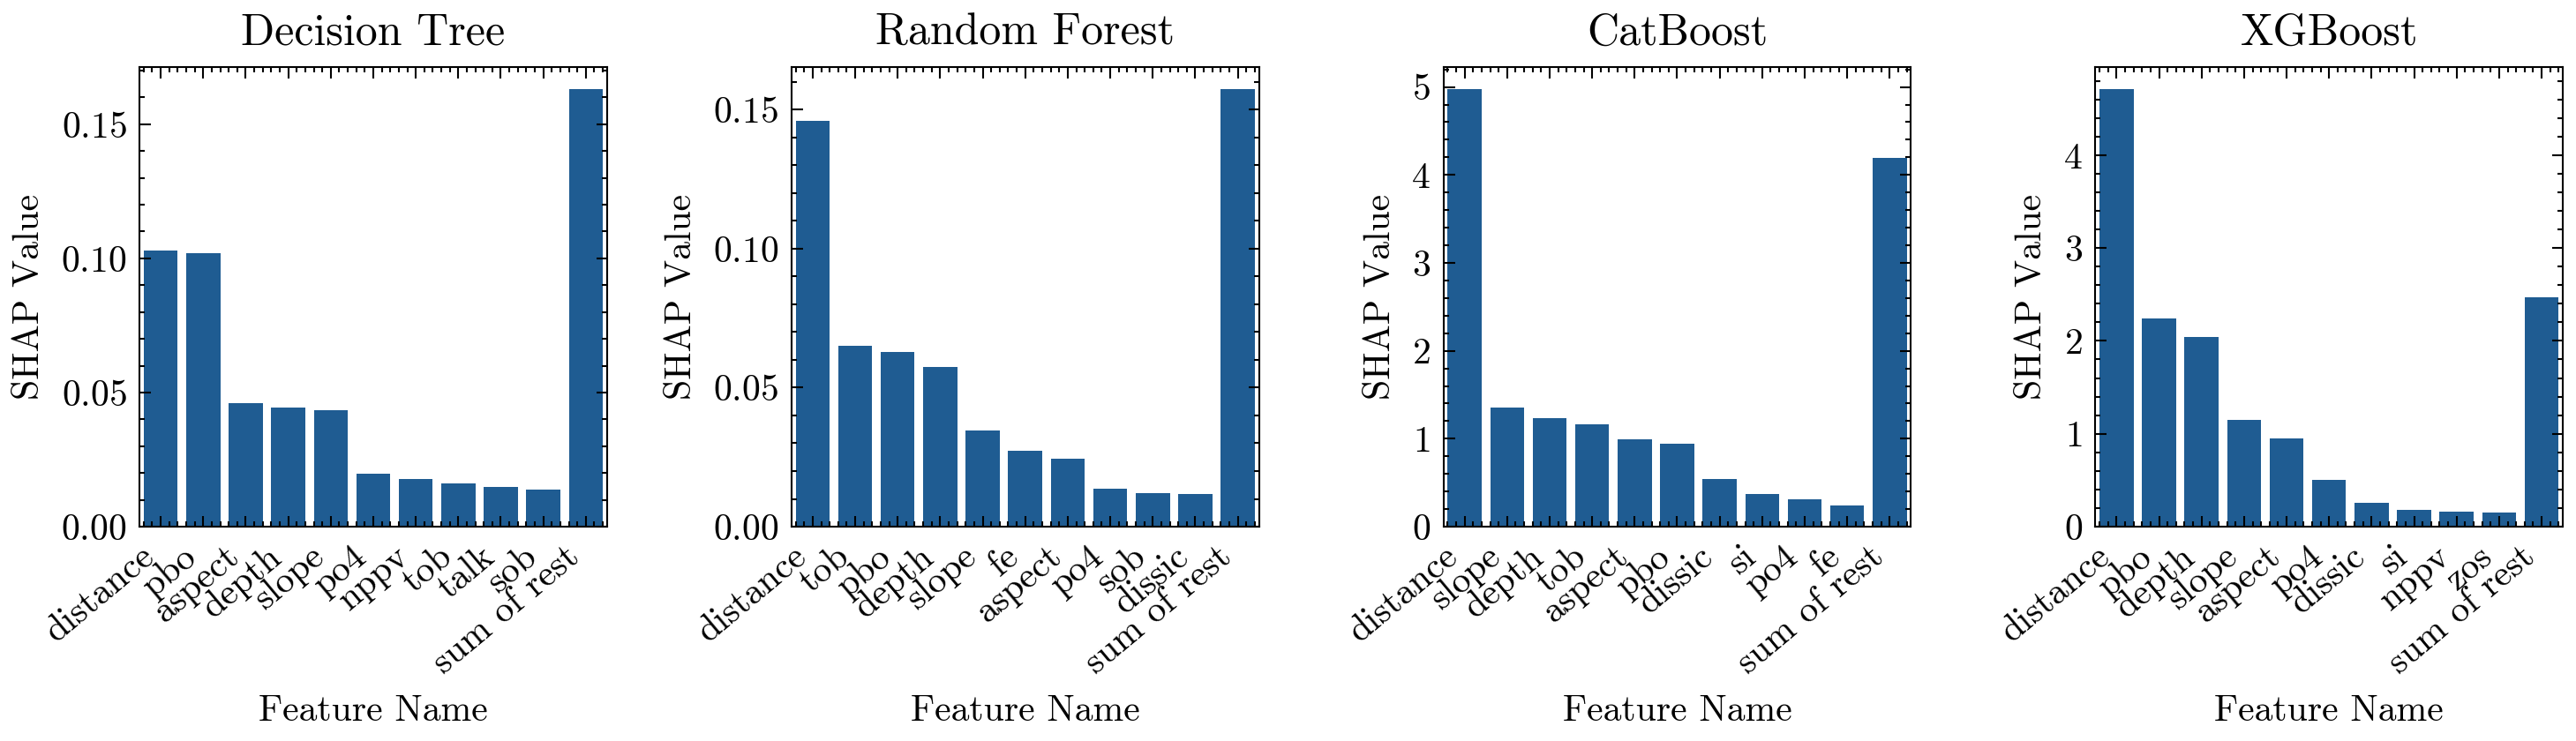

In [19]:
top_n = 10
fig, ax = plt.subplots(1, 4, figsize=(10, 3))

for i, model in enumerate(df["model"].unique()):
    sorted_values = df[(df["undersampling"] == True) & (df["model"] == model)].sort_values("shap_value", ascending=False)
    plot_values = sorted_values.iloc[:top_n][["variable_name", "shap_value"]].to_dict(orient="records") + [{"variable_name": "sum of rest", "shap_value": sorted_values.iloc[5:]["shap_value"].sum()}]
    plot_df = pd.DataFrame(plot_values)

    sns.barplot(data=plot_df, x="variable_name", y="shap_value", ax=ax[i])
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=40, ha="right")
    ax[i].set_title(model)
    ax[i].set_xlabel("Feature Name")
    ax[i].set_ylabel("SHAP Value")

fig.tight_layout()
fig.savefig("FIG-9.jpg")
fig.savefig("FIG-9.pdf")

plt.show()

## Cross-Validation Performance

In [ ]:
df_cv = pd.read_csv("../dataset/cross-val-undersampling.csv", index_col=0)
df_cv["model_name"] = df_cv["model"].replace({"xgboost": "XGBoost", "catboost": "CatBoost", "decision-tree": "Decision Tree", "random-forest": "Random Forest"})
df_cv.head()

,model,fold,accuracy,precision,recall,f1,mcc,roc_auc,ap,training_duration,inference_duration,model_name
0,xgboost,1,0.998708,0.997423,1.0,0.998710,0.997420,0.998708,0.997423,0.573012,0.006827,XGBoost
1,xgboost,2,0.998708,0.997423,1.0,0.998710,0.997420,0.998708,0.997423,1.077046,0.012677,XGBoost
2,xgboost,3,0.997786,0.995591,1.0,0.997791,0.995581,0.997785,0.995591,0.571794,0.006602,XGBoost
3,xgboost,4,0.997970,0.995957,1.0,0.997975,0.995948,0.997970,0.995957,0.587591,0.008029,XGBoost
4,xgboost,5,0.997970,0.995956,1.0,0.997974,0.995948,0.997970,0.995956,0.680932,0.010453,XGBoost


/tmp/ipykernel_10585/120087231.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


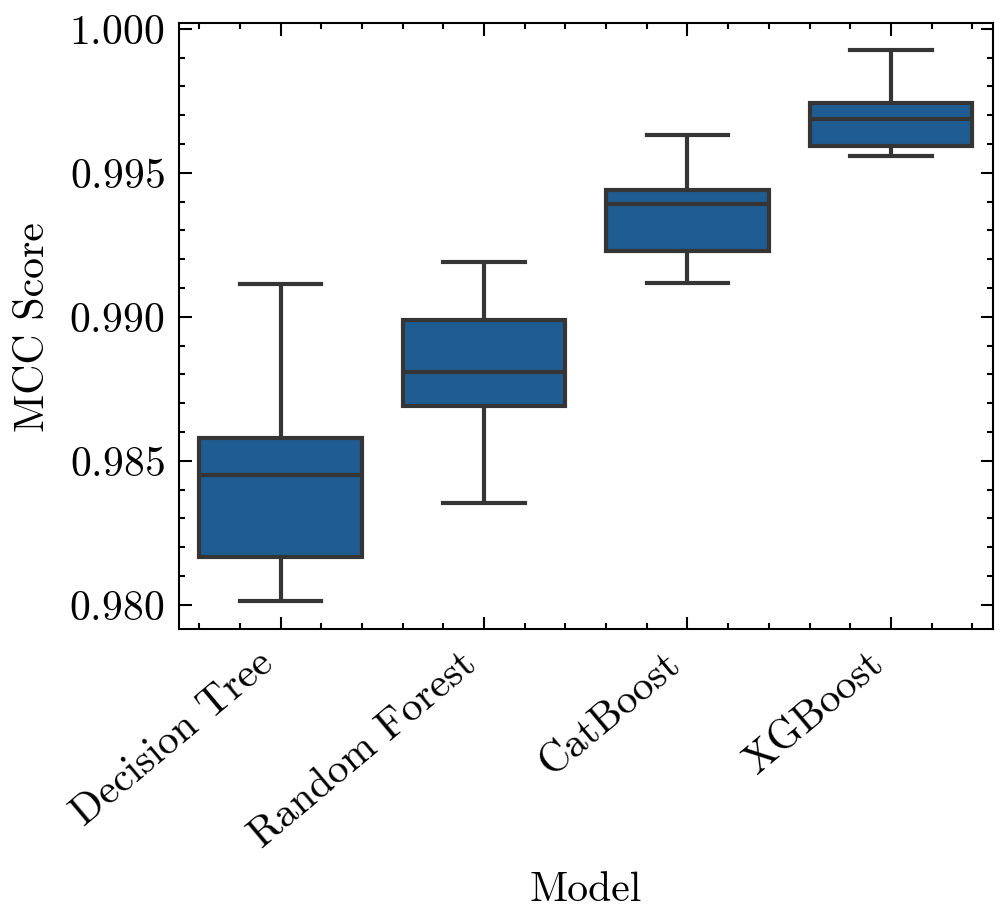

In [ ]:
fig, ax = plt.subplots()
sns.boxplot(df_cv, x="model_name", y="mcc", order=["Decision Tree", "Random Forest", "CatBoost", "XGBoost"])
ax.set_ylabel("MCC Score")
ax.set_xlabel("Model")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig.savefig("FIG-5.jpg")
fig.savefig("FIG-5.pdf")
plt.show()

## ANOVA CV Feature Selection

In [34]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [35]:
df_feature_selection = pd.read_csv("../dataset/cross-val-feature-selection.csv", index_col=0)
df_feature_selection.head()

,feature_count,fold,accuracy,precision,recall,f1,mcc,roc_auc,ap,training_duration,inference_duration
0,25,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.592665,0.086898
1,25,2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,15.406289,0.105340
2,25,3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,12.438944,0.112219
3,25,4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,18.059823,0.086321
4,25,5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,14.452822,0.091441


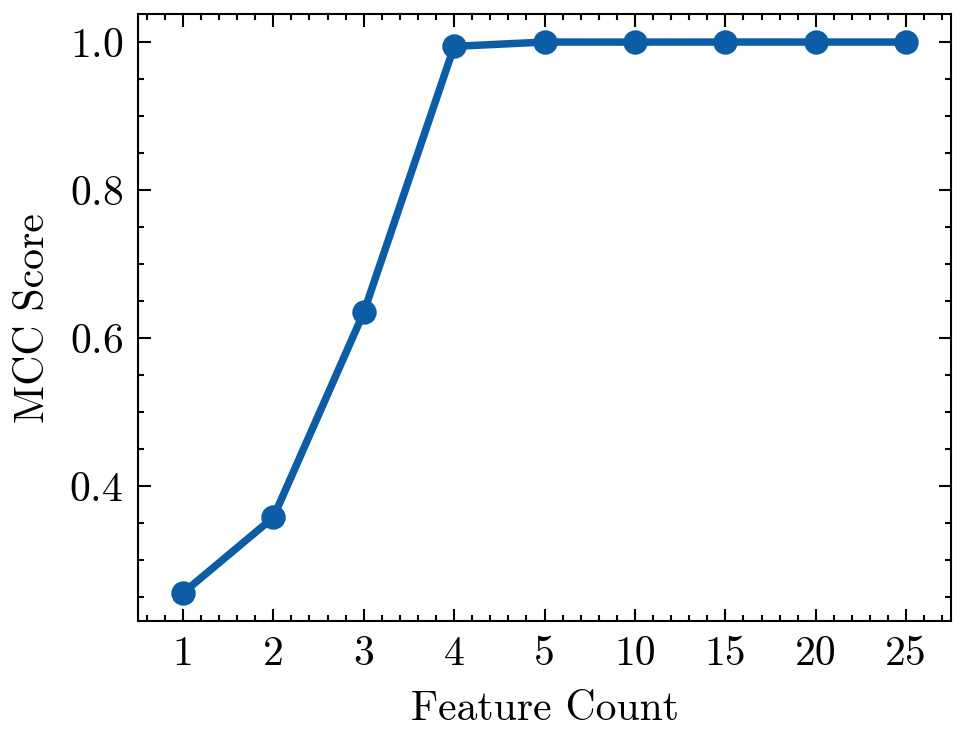

In [46]:
fig, ax = plt.subplots()
sns.pointplot(df_feature_selection, x="feature_count", y="mcc")
ax.set_ylabel("MCC Score")
ax.set_xlabel("Feature Count")

fig.savefig("FIG-12.jpg")
fig.savefig("FIG-12.pdf")
plt.show()

In [37]:
model_ols = smf.ols("mcc ~ C(feature_count)", data=df_feature_selection[["feature_count", "mcc"]]).fit()
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mcc   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.577e+05
Date:                Sun, 15 Dec 2024   Prob (F-statistic):          1.25e-188
Time:                        13:06:21   Log-Likelihood:                 474.95
No. Observations:                  90   AIC:                            -931.9
Df Residuals:                      81   BIC:                            -909.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.2555      0.000    620.339      0.000       0.255       0.256
C(feature_count)[T.2]      0.1021      0.001    175.349      0.000       0.101       0.103
C(feature_count)[T.3]      0.3792      0.001    650.894      0.000       0.378       0.380
C(feature_count)[T.4]      0.7386      0.001   1268.003      0.000       0.737       0.740
C(feature_count)[T.5]      0.7445      0.001   1278.067      0.000       0.743       0.746
C(feature_count)[T.10]     0.7444      0.001   1277.924      0.000       0.743       0.746
C(feature_count)[T.15]     0.7445      0.001   1278.067      0.000       0.743       0.746
C(feature_count)[T.20]     0.7445      0.001   1278.039      0.000       0.743       0.746
C(feature_count)[T.25]     0.7445      0.001   1278.039      0.000       0.743       0.746
==============================================================================
Omnibus:                       28.603   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              312.533
Skew:                          -0.337   Prob(JB):                     1.36e-68
Kurtosis:                      12.104   Cond. No.                         9.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
sm.stats.anova_lm(model_ols, typ=2)

,sum_sq,df,F,PR(>F)
C(feature_count),7.569141,8.0,557676.151652,1.248698e-188
Residual,0.000137,81.0,NaN,NaN


In [39]:
res = stat()
res.tukey_hsd(df=df_feature_selection[["feature_count", "mcc"]], res_var='mcc', xfac_var='feature_count', anova_model='mcc ~ C(feature_count)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,25,20,0.000000,-0.001856,0.001856,0.000000,0.900
1,25,15,0.000017,-0.001840,0.001873,0.040525,0.900
2,25,10,0.000067,-0.001790,0.001923,0.162119,0.900
3,25,5,0.000017,-0.001840,0.001873,0.040525,0.900
4,25,4,0.005846,0.003989,0.007702,14.192811,0.001
5,25,3,0.365317,0.363460,0.367173,886.915981,0.001
6,25,2,0.642326,0.640469,0.644182,1559.438202,0.001
7,25,1,0.744468,0.742612,0.746325,1807.419721,0.001
8,20,15,0.000017,-0.001840,0.001873,0.040525,0.900
9,20,10,0.000067,-0.001790,0.001923,0.162119,0.900
